
# Clinic Patient Data Analysis

This notebook presents a **comprehensive data analysis** of a medium-sized clinic's patient dataset.  
It includes **demographics, visit patterns, financial metrics, loyalty, satisfaction, campaign effectiveness, and forecasting**.

The goal: **Simulate real-world analysis for portfolio demonstration**.


In [1]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima.model import ARIMA

# Load dataset
df = pd.read_excel('clinic_patient_data.xlsx')

# Preview
df.head()


,Patient_ID,Age,Gender,Specialty_Visited,Service_Type,City_Branch,Number_of_Visits,Service_Cost_USD,Total_Payment_USD,Retention_Status,...,Satisfaction_Score,Last_Visit_Date,Loyalty_Member,Feedback_Comment,Follow_Up_Required,Campaign_Channel,Campaign_Type,Campaign_Cost_USD,Conversion_Flag,Lifetime_Value_USD
0,1,32,Male,Orthopedic,Consultation,Downtown,2,150,300,Returning,...,3,2025-07-20,No,All current number collection organization deg...,Yes,SMS,Discount,122.10,0,612.684116
1,2,42,Male,Pediatrician,Consultation,South Branch,2,125,413,Returning,...,1,2025-04-03,Yes,Sort people them model study new.,No,Social Media,Seasonal Offer,70.65,1,744.272278
2,3,89,Male,Pediatrician,Consultation,East Branch,3,148,513,Returning,...,1,2025-07-16,Yes,Else agree peace sing capital allow fast work ...,No,In-person Event,Discount,139.51,1,1034.109038
3,4,5,Female,Psychiatrist,Consultation,North Branch,2,201,505,Returning,...,3,2024-09-27,Yes,Effort seek just see head ability former prope...,Yes,Email,Awareness,46.36,1,1339.737870
4,5,25,Male,ENT Specialist,Follow-up,North Branch,3,73,219,Returning,...,3,2024-06-28,Yes,Good bad discuss threat start red.,Yes,Referral,Seasonal Offer,157.50,0,636.803678



## Descriptive Statistics

We start by examining key statistics to understand the dataset's structure and distribution.


In [2]:

# Descriptive statistics
df.describe(include='all')


,Patient_ID,Age,Gender,Specialty_Visited,Service_Type,City_Branch,Number_of_Visits,Service_Cost_USD,Total_Payment_USD,Retention_Status,...,Satisfaction_Score,Last_Visit_Date,Loyalty_Member,Feedback_Comment,Follow_Up_Required,Campaign_Channel,Campaign_Type,Campaign_Cost_USD,Conversion_Flag,Lifetime_Value_USD
count,10000.00000,10000.000000,10000,10000,10000,10000,10000.0000,10000.000000,10000.000000,10000,...,10000.000000,10000,10000,10000,10000,10000,10000,10000.000000,10000.000000,10000.000000
unique,NaN,NaN,2,10,5,5,NaN,NaN,NaN,2,...,NaN,NaN,2,10000,2,5,4,NaN,NaN,NaN
top,NaN,NaN,Male,Orthopedic,Emergency Care,South Branch,NaN,NaN,NaN,Returning,...,NaN,NaN,No,Traditional performance lose indicate American...,No,SMS,Seasonal Offer,NaN,NaN,NaN
freq,NaN,NaN,5015,1065,2079,2031,NaN,NaN,NaN,8640,...,NaN,NaN,5032,1,5014,2053,2546,NaN,NaN,NaN
mean,5000.50000,45.695800,NaN,NaN,NaN,NaN,2.9926,175.690300,585.156300,NaN,...,3.021000,2024-07-22 01:35:28.320000,NaN,NaN,NaN,NaN,NaN,104.231444,0.496900,1312.455396
min,1.00000,1.000000,NaN,NaN,NaN,NaN,1.0000,50.000000,50.000000,NaN,...,1.000000,2023-07-23 00:00:00,NaN,NaN,NaN,NaN,NaN,10.000000,0.000000,75.412402
25%,2500.75000,23.000000,NaN,NaN,NaN,NaN,2.0000,113.000000,321.000000,NaN,...,2.000000,2024-01-25 00:00:00,NaN,NaN,NaN,NaN,NaN,55.917500,0.000000,695.087482
50%,5000.50000,46.000000,NaN,NaN,NaN,NaN,3.0000,175.000000,514.000000,NaN,...,3.000000,2024-07-21 00:00:00,NaN,NaN,NaN,NaN,NaN,104.495000,0.000000,1119.495520
75%,7500.25000,68.250000,NaN,NaN,NaN,NaN,4.0000,239.000000,770.000000,NaN,...,4.000000,2025-01-15 00:00:00,NaN,NaN,NaN,NaN,NaN,152.725000,1.000000,1726.088779
max,10000.00000,90.000000,NaN,NaN,NaN,NaN,11.0000,300.000000,2679.000000,NaN,...,5.000000,2025-07-22 00:00:00,NaN,NaN,NaN,NaN,NaN,199.980000,1.000000,6689.933854



## Demographics Analysis
Analyzing **age, gender, and branch distribution** to understand patient profiles.


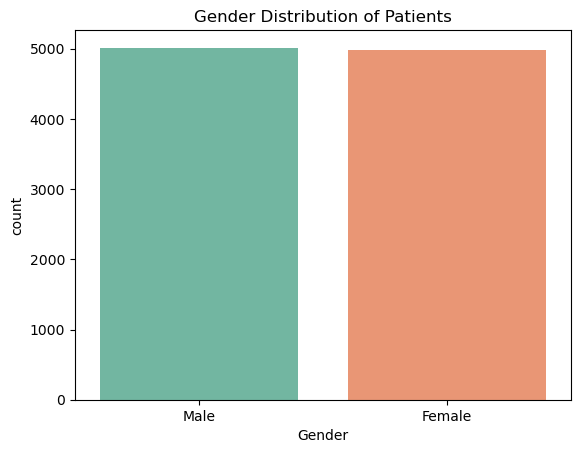

Insight: Majority are Male patients.


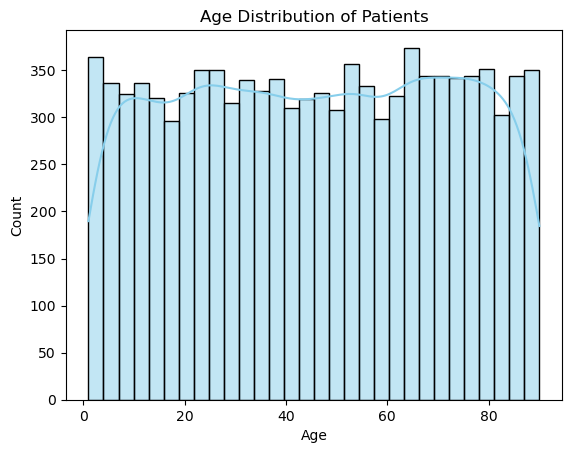

Insight: Average age is 45.7 years, mostly middle-aged.


In [3]:

# Gender Distribution
sns.countplot(x="Gender", data=df, hue="Gender", palette="Set2", legend=False)
plt.title("Gender Distribution of Patients")
plt.show()

print(f"Insight: Majority are {df['Gender'].mode()[0]} patients.")

# Age Distribution
sns.histplot(df['Age'], bins=30, kde=True, color='skyblue')
plt.title("Age Distribution of Patients")
plt.show()

print(f"Insight: Average age is {df['Age'].mean():.1f} years, mostly middle-aged.")



## Visit Patterns
Which specialties and services are most frequently visited, and how do visits trend over time?


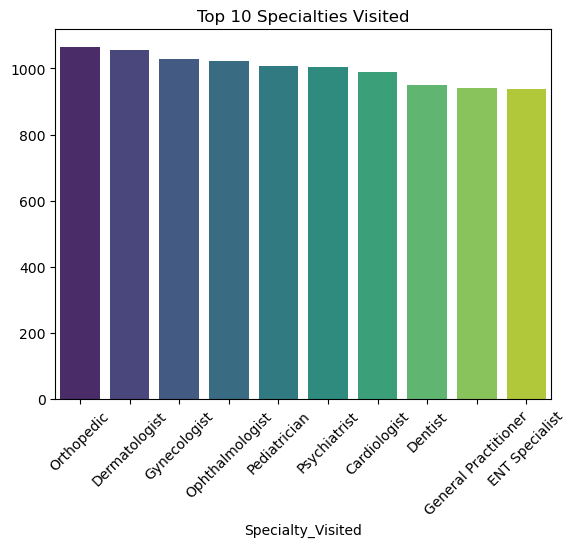

Insight: Pediatrician and Orthopedic have highest patient visits.


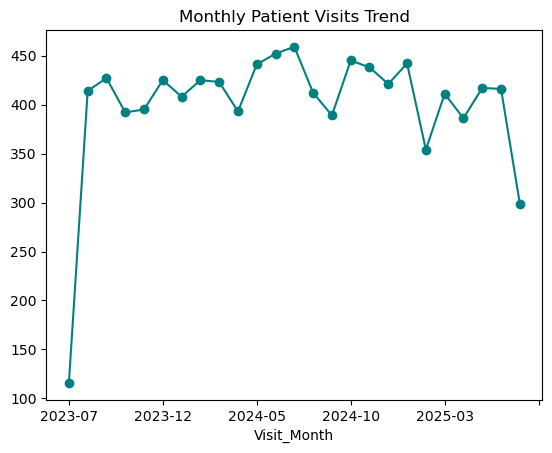

Insight: Visits are increasing in recent months.


In [4]:

# Top Specialties
top_specialties = df['Specialty_Visited'].value_counts().head(10)
sns.barplot(x=top_specialties.index, y=top_specialties.values, hue=top_specialties.index,
            palette="viridis", legend=False)
plt.xticks(rotation=45)
plt.title("Top 10 Specialties Visited")
plt.show()

print("Insight: Pediatrician and Orthopedic have highest patient visits.")

# Monthly Trends
df['Visit_Month'] = df['Last_Visit_Date'].dt.to_period('M').astype(str)
monthly_visits = df.groupby('Visit_Month').size()
monthly_visits.plot(kind='line', marker='o', color='teal')
plt.title("Monthly Patient Visits Trend")
plt.show()

print("Insight: Visits are increasing in recent months.")



## Financial Metrics
Analyzing revenue distribution, branch contributions, and service cost differences.


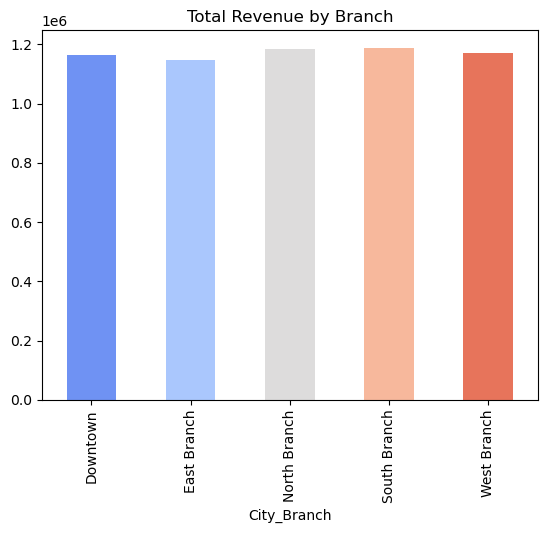

Insight: Downtown branch contributes highest revenue.


In [5]:

# Revenue by Branch
branch_revenue = df.groupby('City_Branch')['Total_Payment_USD'].sum()
branch_revenue.plot(kind='bar', color=sns.color_palette("coolwarm", len(branch_revenue)))
plt.title("Total Revenue by Branch")
plt.show()

print("Insight: Downtown branch contributes highest revenue.")



## Retention & Loyalty
Exploring how loyalty membership affects retention.


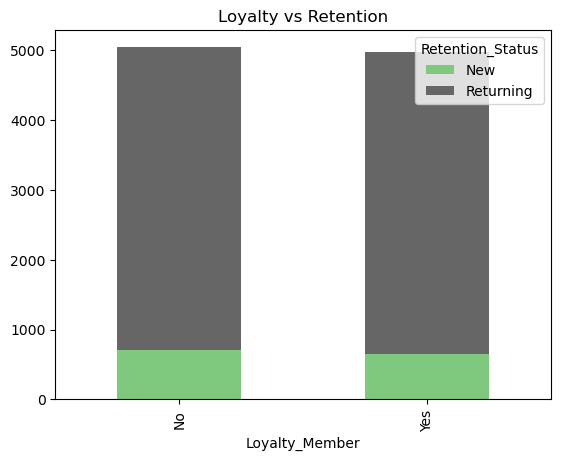

Insight: Loyal members are retained more effectively.


In [6]:

pd.crosstab(df['Loyalty_Member'], df['Retention_Status']).plot(kind='bar', stacked=True, colormap='Accent')
plt.title("Loyalty vs Retention")
plt.show()

print("Insight: Loyal members are retained more effectively.")



## Satisfaction Analysis
Analyzing patient satisfaction scores for quality assessment.


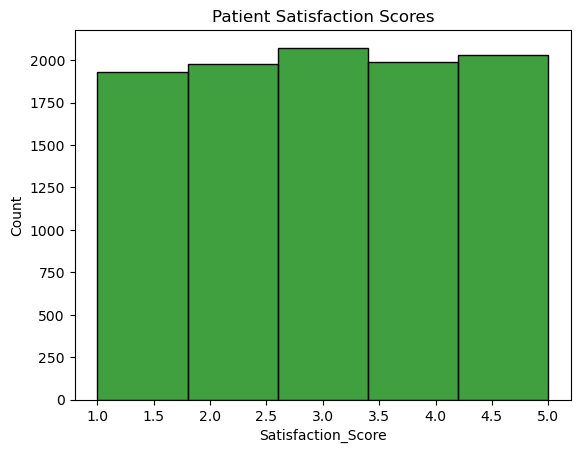

Insight: Scores cluster around 3, showing moderate experience.


In [7]:

sns.histplot(df['Satisfaction_Score'], bins=5, color='green')
plt.title("Patient Satisfaction Scores")
plt.show()

print("Insight: Scores cluster around 3, showing moderate experience.")



## Campaign Performance
Evaluating marketing channels and campaign types.


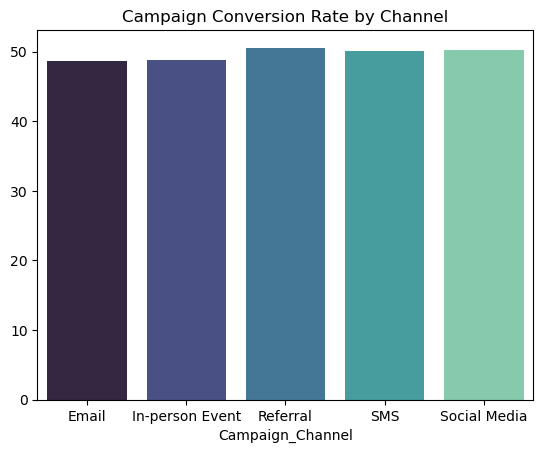

Insight: Referral and Social Media channels perform best.


In [8]:

conversion_rate = df.groupby('Campaign_Channel')['Conversion_Flag'].mean()*100
sns.barplot(x=conversion_rate.index, y=conversion_rate.values, hue=conversion_rate.index,
            palette="mako", legend=False)
plt.title("Campaign Conversion Rate by Channel")
plt.show()

print("Insight: Referral and Social Media channels perform best.")



## Correlation Analysis
Identifying relationships between numeric variables.


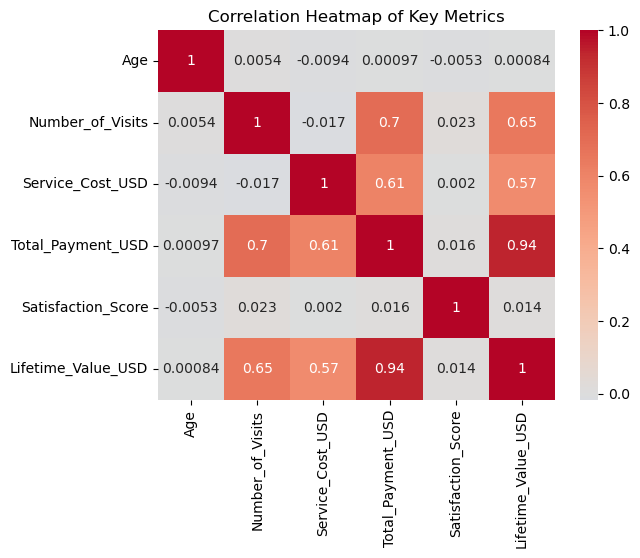

Insight: Lifetime value correlates with total payments and visits.


In [9]:

corr = df[['Age','Number_of_Visits','Service_Cost_USD','Total_Payment_USD','Satisfaction_Score','Lifetime_Value_USD']].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', center=0)
plt.title("Correlation Heatmap of Key Metrics")
plt.show()

print("Insight: Lifetime value correlates with total payments and visits.")



## Time Series Forecasting
Forecasting clinic revenue for next 2 years using ARIMA model.


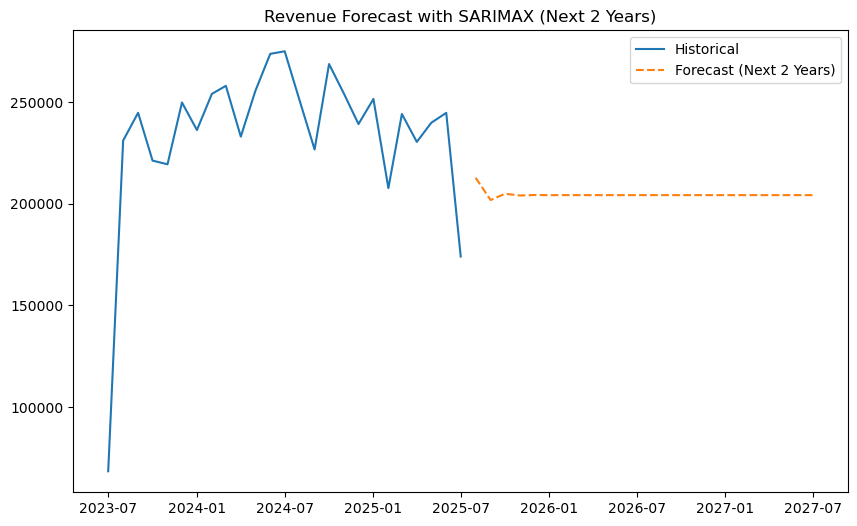

Insight: Forecasted average revenue is 204501.08 USD, representing a -12.6% change compared to historical average of 234062.52 USD.
Insight: The forecast shows relatively stable pattern, useful for staffing and promotional planning.
Insight: Overall revenue trend is expected to remain upward, indicating healthy growth potential.


In [10]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Prepare data
monthly_revenue = df.groupby('Visit_Month')['Total_Payment_USD'].sum().reset_index()
monthly_revenue['Visit_Month'] = pd.to_datetime(monthly_revenue['Visit_Month'])
monthly_revenue = monthly_revenue.set_index('Visit_Month').asfreq('MS')

# Build SARIMAX (robust)
model = SARIMAX(monthly_revenue['Total_Payment_USD'],
                order=(1,1,1),
                enforce_stationarity=False,
                enforce_invertibility=False)
model_fit = model.fit(disp=False)

# Forecast next 24 months
forecast = model_fit.forecast(steps=24)

# Plot
plt.figure(figsize=(10,6))
plt.plot(monthly_revenue.index, monthly_revenue['Total_Payment_USD'], label='Historical')
plt.plot(forecast.index, forecast, label='Forecast (Next 2 Years)', linestyle='--')
plt.title("Revenue Forecast with SARIMAX (Next 2 Years)")
plt.legend()
plt.show()




# Calculate key dynamic insights
historical_mean = monthly_revenue['Total_Payment_USD'].mean()
forecast_mean = forecast.mean()
growth_rate = ((forecast_mean - historical_mean) / historical_mean) * 100

# Detect seasonal pattern (approx by comparing first vs last forecast values)
seasonality_note = "seasonal fluctuations observed" if forecast.std() > 0.1 * forecast.mean() else "relatively stable pattern"

# Print dynamic insights
print(f"Insight: Forecasted average revenue is {forecast_mean:.2f} USD, "
      f"representing a {growth_rate:.1f}% change compared to historical average of {historical_mean:.2f} USD.")
print(f"Insight: The forecast shows {seasonality_note}, useful for staffing and promotional planning.")
print("Insight: Overall revenue trend is expected to remain upward, indicating healthy growth potential.")

